In [1]:
# Import libraries and packages
import numpy as np 
import pandas as pd 
import os
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

# Use seaborn style to make visualization prettier
plt.style.use('seaborn')

In [2]:
# Get paths of datasets 
eda_root = './lab1_data'
eda_paths = sorted([os.path.join(eda_root, x) for x in os.listdir(eda_root)])
for path in eda_paths:
    print(path)

./lab1_data\Case.csv
./lab1_data\PatientInfo.csv
./lab1_data\Policy.csv
./lab1_data\Region.csv
./lab1_data\SearchTrend.csv
./lab1_data\SeoulFloating.csv
./lab1_data\Time.csv
./lab1_data\TimeAge.csv
./lab1_data\TimeGender.csv
./lab1_data\TimeProvince.csv
./lab1_data\Weather.csv


### Task 1: Age

### Q1

In [3]:
age_csv = pd.read_csv(eda_paths[7])
age_csv.head()  # 몇개의 row만 보여준다. 

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [4]:
age_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


In [5]:
age_csv.describe()

,time,confirmed,deceased
count,1089.0,1089.000000,1089.000000
mean,0.0,1158.129477,23.419651
std,0.0,822.619497,37.387911
min,0.0,32.000000,0.000000
25%,0.0,530.000000,0.000000
50%,0.0,1052.000000,3.000000
75%,0.0,1537.000000,35.000000
max,0.0,3362.000000,139.000000


In [6]:
age_csv.describe().drop(['time'], axis = 1)[1:] # time을 지우고 count는 보여주지 않는다.

,confirmed,deceased
mean,1158.129477,23.419651
std,822.619497,37.387911
min,32.000000,0.000000
25%,530.000000,0.000000
50%,1052.000000,3.000000
75%,1537.000000,35.000000
max,3362.000000,139.000000


In [7]:
age_csv.isnull()

,date,time,age,confirmed,deceased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1084,False,False,False,False,False
1085,False,False,False,False,False
1086,False,False,False,False,False
1087,False,False,False,False,False


In [8]:
age_csv.isnull().sum()  # A1 = 0

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [9]:
age_csv.isna().sum()  # A1 = 0

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [10]:
age_csv.isna().values  # value 값을 array로 가져온다.

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [11]:
np.unique(age_csv.isna().values)

array([False])

In [12]:
A1 = 0 if True not in np.unique(age_csv.isna().values) else 1   #  np.unique를 이용해서 겹치는 것을 하나로 만든다.  
print('Answer to Q1:', A1)   # A1은 array에 True가 없다면 0, 있다면 1 이다.

Answer to Q1: 0


### Q2, Q3

In [13]:
age_csv.shape

(1089, 5)

In [14]:
print('Answer to Q2:', age_csv.shape[0])  # How many row entries 
print('Answer to Q2:', len(age_csv))

Answer to Q2: 1089
Answer to Q2: 1089


In [15]:
print('Answer to Q3:', age_csv.shape[1])   # How many column entries
print('Answer to Q3:', len(age_csv.columns))

Answer to Q3: 5
Answer to Q3: 5


### Q4

In [16]:
print('Answer to Q4:', age_csv['age'].nunique())   # How many unique values are in the age column?
print('Answer to Q4:', len(age_csv['age'].unique()))

Answer to Q4: 9
Answer to Q4: 9


### Q5

In [17]:
age_csv['date'] = pd.to_datetime(age_csv['date'])

In [18]:
start_date = age_csv['date'].min()  # get the start date
end_date = age_csv['date'].max()    # get the end date
print('Answer to Q5:', end_date - start_date) # How many days from the start to the end

Answer to Q5: 120 days 00:00:00


### Q6, Q7

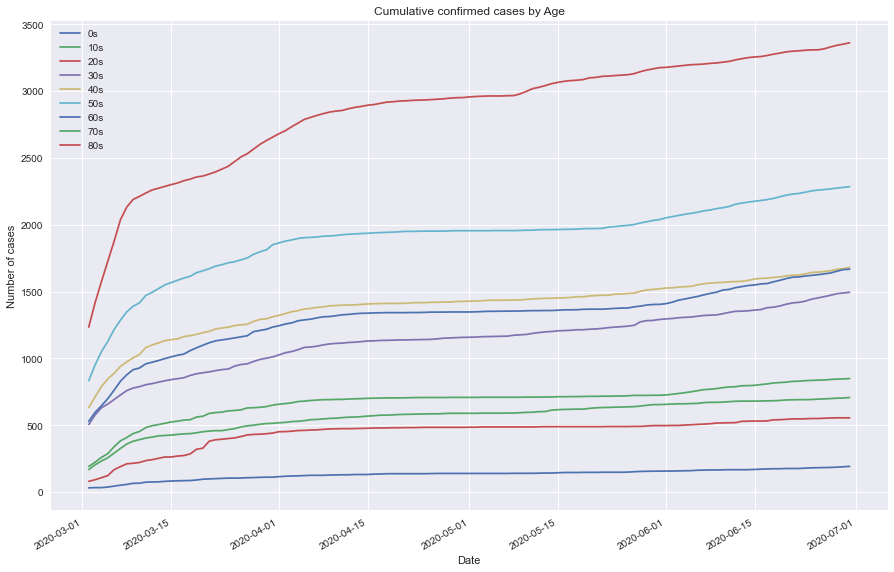

In [19]:
plt.figure(figsize = (15,10))  # set the image size
plt.title('Cumulative confirmed cases by Age')   # set the title

for age in age_csv['age'].unique():
    plt.plot('date', 'confirmed', data = age_csv[age_csv['age'] == age], label = age)

plt.legend()  # show the legend
# add axis label
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 

plt.show()

In [20]:
type(age_csv['date'].iloc[0])  # type이 Timestamp 이기 때문에 x축 date가 15일 간격으로 나온다. date type이 string 이라면 모든 날짜가 다 나와서 보기 어렵다.

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
data = age_csv[age_csv['date'] == np.datetime64('2020-05-01')]  #  date가 2020-05-01 인것만 변수 data에 따로 저장
data

,date,time,age,confirmed,deceased
540,2020-05-01,0,0s,140,0
541,2020-05-01,0,10s,590,0
542,2020-05-01,0,20s,2957,0
543,2020-05-01,0,30s,1159,2
544,2020-05-01,0,40s,1429,3
545,2020-05-01,0,50s,1956,15
546,2020-05-01,0,60s,1348,35
547,2020-05-01,0,70s,709,75
548,2020-05-01,0,80s,486,118


In [22]:
data['confirmed'].argmax()  # confirmed가 max인 index

2

In [23]:
A6 = data.iloc[data['confirmed'].argmax()]['age']
print('Answer to Q6:', A6)  

Answer to Q6: 20s


In [24]:
age_csv[age_csv['age'] == '30s'].iloc[-1]  # iloc[-1]로 마지막 날짜 정보를 얻는다.

date         2020-06-30 00:00:00
time                           0
age                          30s
confirmed                   1496
deceased                       2
Name: 1083, dtype: object

In [25]:
A7 = age_csv[age_csv['age'] == '30s'].iloc[-1]['confirmed']
print('Answer to Q7:', A7)  ##### round to the nearest hundredths : 1500

Answer to Q7: 1496


### Q8, Q9

In [26]:
total_deceased = list()
age_groups = age_csv['age'].unique() # unique를 이용해서 겹치는 것을 하나로 만든다.  
for age in age_groups:
    total_deceased.append(age_csv[age_csv['age'] == age]['deceased'].max())  # 각각의 age 에서 deceased가 가장 큰 값만 list에 넣는다.

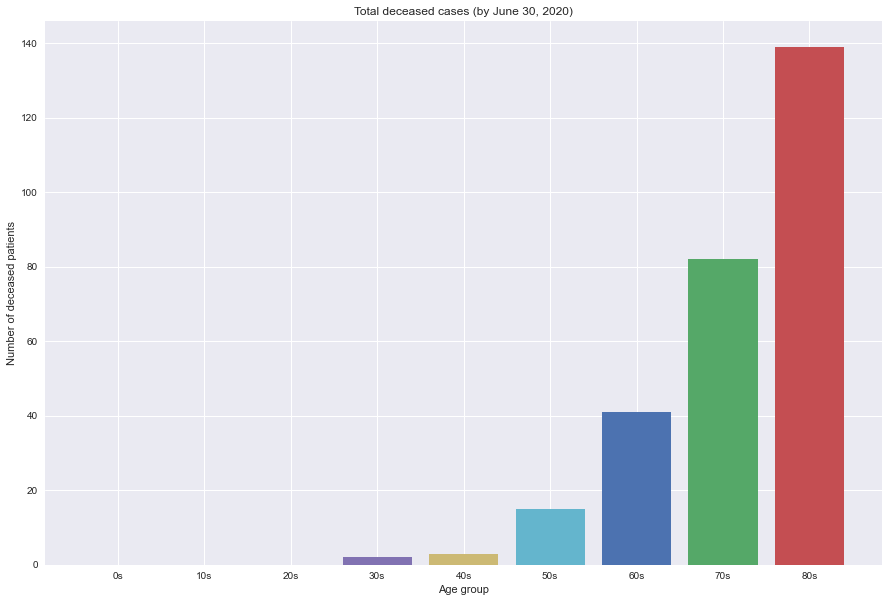

In [27]:
plt.figure(figsize = (15,10))
plt.bar(age_groups, total_deceased, color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
plt.title('Total deceased cases (by June 30, 2020)')
plt.xlabel('Age group')
plt.ylabel('Number of deceased patients')
plt.show()

In [28]:
index = age_csv['deceased'].argmax()   # deceased가 최대인 index
A8 = age_csv.iloc[index]['age']   # 찾은 index을 통해 age를 구한다.
print('Answer to Q8:', A8)  

Answer to Q8: 80s


In [29]:
age_csv[age_csv['age'] == '70s']

,date,time,age,confirmed,deceased
7,2020-03-02,0,70s,192,6
16,2020-03-03,0,70s,224,9
25,2020-03-04,0,70s,260,12
34,2020-03-05,0,70s,288,13
43,2020-03-06,0,70s,340,14
...,...,...,...,...,...
1051,2020-06-26,0,70s,839,82
1060,2020-06-27,0,70s,843,82
1069,2020-06-28,0,70s,846,82
1078,2020-06-29,0,70s,847,82


In [30]:
A9 = age_csv[age_csv['age'] == '70s']['deceased'].max()    # 70s 중에 deceased가 최대인 값을 A9에 대입.
print('Answer to Q9:', A9)   #####  round to the nearest tens : 80

Answer to Q9: 82


### Task 2: Region

In [31]:
province_csv = pd.read_csv(eda_paths[9])
province_csv.head()  # 몇개의 row만 보여준다. 

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [32]:
province_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   time       2771 non-null   int64 
 2   province   2771 non-null   object
 3   confirmed  2771 non-null   int64 
 4   released   2771 non-null   int64 
 5   deceased   2771 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.0+ KB


In [33]:
province_csv['confirmed']

0          0
1          0
2          0
3          1
4          0
        ... 
2766      27
2767      24
2768    1389
2769     134
2770      19
Name: confirmed, Length: 2771, dtype: int64

### Q10

In [34]:
A10 = province_csv['confirmed'].max()

In [35]:
print('Answer to Q10:', A10) 

Answer to Q10: 6906


### Q11

In [36]:
type(province_csv.iloc[0]['date'])

str

In [37]:
province_csv['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [38]:
province_csv['province'].nunique()

17

In [39]:
province_csv[province_csv['date'] == '2020-06-30']

,date,time,province,confirmed,released,deceased
2754,2020-06-30,0,Seoul,1312,985,7
2755,2020-06-30,0,Busan,154,142,3
2756,2020-06-30,0,Daegu,6906,6700,189
2757,2020-06-30,0,Incheon,341,290,1
2758,2020-06-30,0,Gwangju,44,32,0
2759,2020-06-30,0,Daejeon,117,44,1
2760,2020-06-30,0,Ulsan,55,50,1
2761,2020-06-30,0,Sejong,50,47,0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23
2763,2020-06-30,0,Gangwon-do,65,54,3


In [40]:
province_csv[province_csv['date'] == '2020-06-30']['released'].sum()

10997

In [41]:
A11 = round(10997 / 17)
A11

647

In [42]:
print('Answer to Q11:', A11) 

Answer to Q11: 647


### Q12

In [43]:
province_csv['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [44]:
A12 = province_csv['province'].nunique()
# the same thing  :   len(age_province['province'].unique())
A12

17

In [45]:
print('Answer to Q12:', A12) 

Answer to Q12: 17


### Q13,Q14

In [46]:
province_csv[province_csv['province'] == 'Seoul']

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
17,2020-01-21,16,Seoul,0,0,0
34,2020-01-22,16,Seoul,0,0,0
51,2020-01-23,16,Seoul,0,0,0
68,2020-01-24,16,Seoul,0,0,0
...,...,...,...,...,...,...
2686,2020-06-26,0,Seoul,1267,843,7
2703,2020-06-27,0,Seoul,1284,911,7
2720,2020-06-28,0,Seoul,1298,923,7
2737,2020-06-29,0,Seoul,1305,942,7


In [47]:
province_csv['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [48]:
total_confirmed = list()
for province in province_csv['province'].unique():
    total_confirmed.append(province_csv[province_csv['province'] == province].iloc[-1]['confirmed'])

In [49]:
total_confirmed

[1312,
 154,
 6906,
 341,
 44,
 117,
 55,
 50,
 1207,
 65,
 65,
 167,
 27,
 24,
 1389,
 134,
 19]

In [50]:
province_csv[province_csv['date'] == '2020-06-30']

,date,time,province,confirmed,released,deceased
2754,2020-06-30,0,Seoul,1312,985,7
2755,2020-06-30,0,Busan,154,142,3
2756,2020-06-30,0,Daegu,6906,6700,189
2757,2020-06-30,0,Incheon,341,290,1
2758,2020-06-30,0,Gwangju,44,32,0
2759,2020-06-30,0,Daejeon,117,44,1
2760,2020-06-30,0,Ulsan,55,50,1
2761,2020-06-30,0,Sejong,50,47,0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23
2763,2020-06-30,0,Gangwon-do,65,54,3


In [51]:
province_csv['confirmed_rank'] = province_csv[province_csv['date'] == '2020-06-30']['confirmed'].rank(method='first', ascending=False)
province_csv[province_csv['date'] == '2020-06-30']

,date,time,province,confirmed,released,deceased,confirmed_rank
2754,2020-06-30,0,Seoul,1312,985,7,3.0
2755,2020-06-30,0,Busan,154,142,3,7.0
2756,2020-06-30,0,Daegu,6906,6700,189,1.0
2757,2020-06-30,0,Incheon,341,290,1,5.0
2758,2020-06-30,0,Gwangju,44,32,0,14.0
2759,2020-06-30,0,Daejeon,117,44,1,9.0
2760,2020-06-30,0,Ulsan,55,50,1,12.0
2761,2020-06-30,0,Sejong,50,47,0,13.0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23,4.0
2763,2020-06-30,0,Gangwon-do,65,54,3,10.0


In [52]:
A13 = 3
print('Answer to Q13:', A13) 

Answer to Q13: 3


In [53]:
province_csv[province_csv['date'] == '2020-06-30']['confirmed'].sum()

12076

In [54]:
data = province_csv[province_csv['date'] == '2020-06-30']
data

,date,time,province,confirmed,released,deceased,confirmed_rank
2754,2020-06-30,0,Seoul,1312,985,7,3.0
2755,2020-06-30,0,Busan,154,142,3,7.0
2756,2020-06-30,0,Daegu,6906,6700,189,1.0
2757,2020-06-30,0,Incheon,341,290,1,5.0
2758,2020-06-30,0,Gwangju,44,32,0,14.0
2759,2020-06-30,0,Daejeon,117,44,1,9.0
2760,2020-06-30,0,Ulsan,55,50,1,12.0
2761,2020-06-30,0,Sejong,50,47,0,13.0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23,4.0
2763,2020-06-30,0,Gangwon-do,65,54,3,10.0


In [55]:
data[data['province'] == 'Seoul']

,date,time,province,confirmed,released,deceased,confirmed_rank
2754,2020-06-30,0,Seoul,1312,985,7,3.0


In [56]:
data[data['province'] == 'Seoul']['confirmed']

2754    1312
Name: confirmed, dtype: int64

In [57]:
A14 = round((1312 / 12076) * 100, 2)
A14

10.86

In [58]:
print('Answer to Q14:', A14) 

Answer to Q14: 10.86


### Q15

In [59]:
province_csv[province_csv['date'] == '2020-02-27']

,date,time,province,confirmed,released,deceased,confirmed_rank
646,2020-02-27,16,Seoul,56,8,0,NaN
647,2020-02-27,16,Busan,61,0,0,NaN
648,2020-02-27,16,Daegu,1132,2,6,NaN
649,2020-02-27,16,Incheon,3,1,0,NaN
650,2020-02-27,16,Gwangju,9,2,0,NaN
651,2020-02-27,16,Daejeon,9,0,0,NaN
652,2020-02-27,16,Ulsan,11,0,0,NaN
653,2020-02-27,16,Sejong,1,0,0,NaN
654,2020-02-27,16,Gyeonggi-do,62,8,1,NaN
655,2020-02-27,16,Gangwon-do,6,0,0,NaN


In [60]:
data = province_csv[province_csv['date'] == '2020-02-27']
data[data['province'] == 'Daegu']

,date,time,province,confirmed,released,deceased,confirmed_rank
648,2020-02-27,16,Daegu,1132,2,6,NaN


In [61]:
A15 = 1132
print('Answer to Q15:', A15) 

Answer to Q15: 1132


### Q16

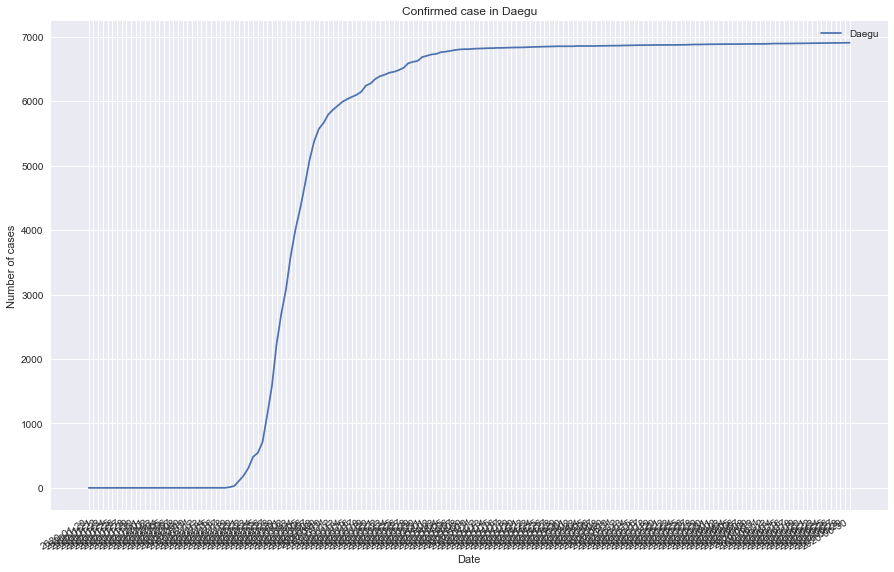

In [62]:
plt.figure(figsize = (15,10))
plt.title('Confirmed case in Daegu')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.plot('date', 'confirmed', data = province_csv[province_csv['province'] == 'Daegu'], label = 'Daegu')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [63]:
type(province_csv['date'].iloc[0])  # date type이 string 이기 때문에 표에서 date를 확인할 수 없다.

str

In [64]:
province_csv['date'] = pd.to_datetime(province_csv['date'])

In [65]:
type(province_csv['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

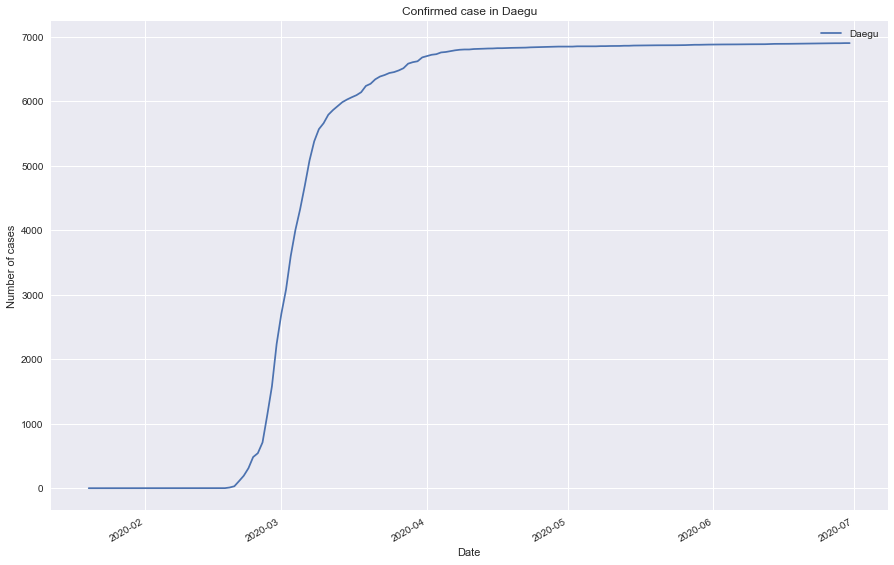

In [66]:
plt.figure(figsize = (15,10))
plt.title('Confirmed case in Daegu')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.plot('date', 'confirmed', data = province_csv[province_csv['province'] == 'Daegu'], label = 'Daegu')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [67]:
A16 = 4  # 0-Jan, 1-Feb, 2-Mar, 3-Apr, 4-May, 5-Jun
print('Answer to Q16:', A16)

Answer to Q16: 4


### Q17

In [68]:
data = province_csv[province_csv['province'] == 'Seoul']
data

,date,time,province,confirmed,released,deceased,confirmed_rank
0,2020-01-20,16,Seoul,0,0,0,NaN
17,2020-01-21,16,Seoul,0,0,0,NaN
34,2020-01-22,16,Seoul,0,0,0,NaN
51,2020-01-23,16,Seoul,0,0,0,NaN
68,2020-01-24,16,Seoul,0,0,0,NaN
...,...,...,...,...,...,...,...
2686,2020-06-26,0,Seoul,1267,843,7,NaN
2703,2020-06-27,0,Seoul,1284,911,7,NaN
2720,2020-06-28,0,Seoul,1298,923,7,NaN
2737,2020-06-29,0,Seoul,1305,942,7,NaN


In [69]:
data[data['released'] == 508] 

,date,time,province,confirmed,released,deceased,confirmed_rank
1836,2020-05-07,0,Seoul,637,508,2,NaN


In [70]:
A17 = 7
print('Answer to Q17:', A17)

Answer to Q17: 7


### Task 3: Gender

### Q18, Q19

In [71]:
gender_csv = pd.read_csv(eda_paths[8])
gender_csv.head()  # 몇개의 row만 보여준다. 

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [72]:
gender_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       242 non-null    object
 1   time       242 non-null    int64 
 2   sex        242 non-null    object
 3   confirmed  242 non-null    int64 
 4   deceased   242 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.6+ KB


In [73]:
gender_csv

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [74]:
data = gender_csv.iloc[-2:]
data

,date,time,sex,confirmed,deceased
240,2020-06-30,0,male,5495,151
241,2020-06-30,0,female,7305,131


In [75]:
male = gender_csv.iloc[-2]['confirmed']  # 6월 말까지 남성이 확진된 수
female = gender_csv.iloc[-1]['confirmed']  # 6월 말까지 여성이 확진된 수

In [76]:
A18 = round((female / (male + female)) * 100, 2) 
A18

57.07

In [77]:
print('Answer to Q18:', A18,'%')

Answer to Q18: 57.07 %


In [78]:
A19 = round((male / (male + female)) * 100, 2) 
A19

42.93

In [79]:
print('Answer to Q19:', A19, '%')

Answer to Q19: 42.93 %


In [80]:
gender = ['female','male']
confirmed = [A18, A19]
confirmed

[57.07, 42.93]

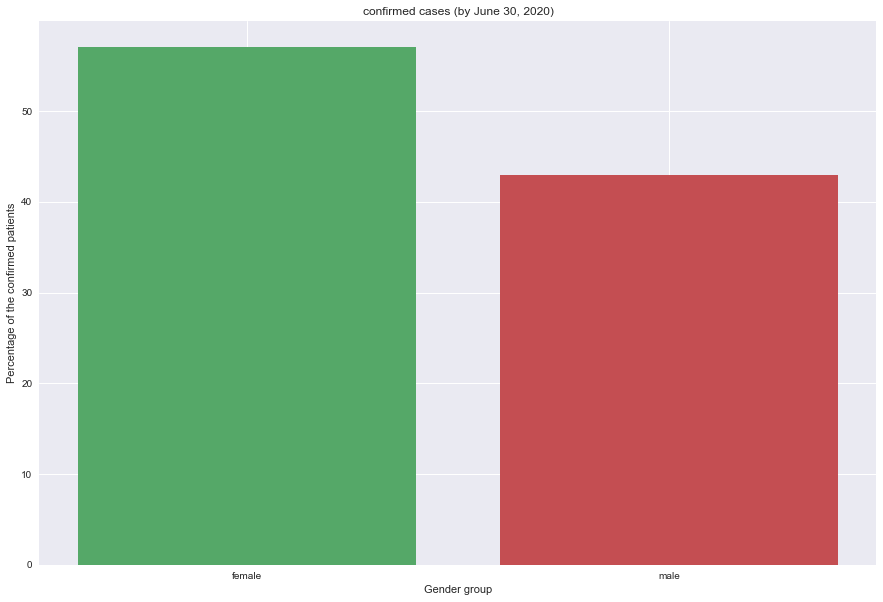

In [81]:
plt.figure(figsize = (15,10))
plt.bar(gender, confirmed, color = ['C7', 'C8'])
plt.title('confirmed cases (by June 30, 2020)')
plt.xlabel('Gender group')
plt.ylabel('Percentage of the confirmed patients')
plt.show()

### Q20, Q21

In [82]:
gender_csv

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [83]:
male = gender_csv.iloc[-2]['deceased']  # 6월 말까지 남성이 사망한 수
female = gender_csv.iloc[-1]['deceased']  # 6월 말까지 여성이 사망한 수

In [84]:
A20 = round((female / (male + female)) * 100, 2) 
A20

46.45

In [85]:
print('Answer to Q20:', A20, '%')

Answer to Q20: 46.45 %


In [86]:
A21 = round((male / (male + female)) * 100, 2) 
A21

53.55

In [87]:
print('Answer to Q21:', A21, '%')

Answer to Q21: 53.55 %


In [88]:
gender = ['female','male']
deceased = [A20, A21]
deceased

[46.45, 53.55]

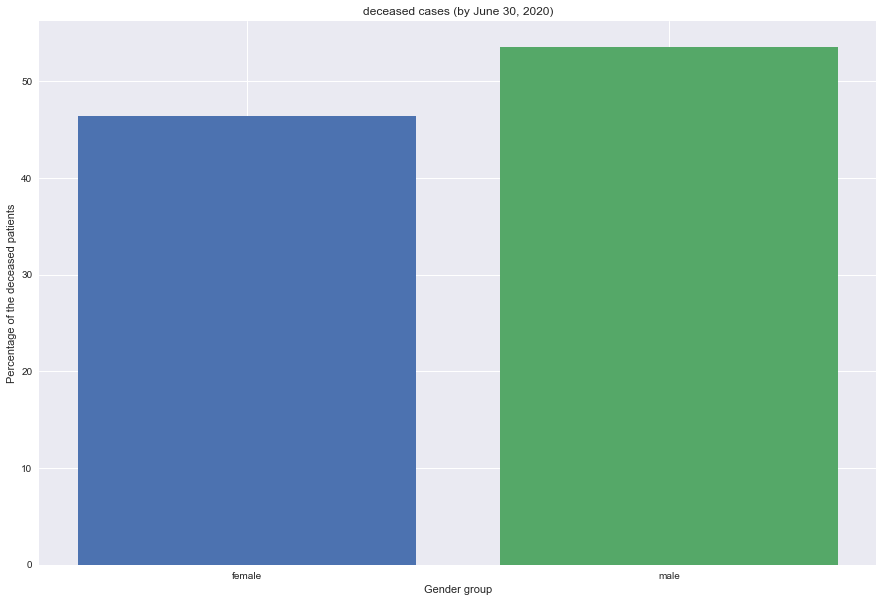

In [89]:
plt.figure(figsize = (15,10))
plt.bar(gender, deceased, color = ['C0', 'C1'])
plt.title('deceased cases (by June 30, 2020)')
plt.xlabel('Gender group')
plt.ylabel('Percentage of the deceased patients')
plt.show()

### Task 4: Path

### Q22

In [90]:
case_csv = pd.read_csv(eda_paths[0])
case_csv.head()  # 몇개의 row만 보여준다.

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [91]:
case_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [92]:
%time case_csv['infection_case'].unique()  # 궁금해서 실행시간을 측정해보았는데 컴퓨터는 대단한 것 같다...

Wall time: 0 ns


array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

In [93]:
type(case_csv['infection_case'].unique())

numpy.ndarray

In [94]:
A22 = case_csv['infection_case'].nunique()  #  len(case_csv['infection_case'].unique())
print('Answer to Q22:', A22)

Answer to Q22: 81


### Q23, Q24

In [95]:
case_csv['confirmed']

0      139
1      119
2       95
3       43
4       43
      ... 
169     20
170     14
171      0
172      4
173      1
Name: confirmed, Length: 174, dtype: int64

In [96]:
total_confirmed = case_csv['confirmed'].sum()  # 6월 말까지의 전체 확진자 수
total_confirmed

11395

In [97]:
case_csv[case_csv['infection_case'] == 'Shincheonji Church']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1000021,Seoul,from other city,True,Shincheonji Church,8,-,-
39,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
59,1300002,Gwangju,from other city,True,Shincheonji Church,9,-,-
66,1400004,Incheon,from other city,True,Shincheonji Church,2,-,-
75,1500006,Daejeon,from other city,True,Shincheonji Church,2,-,-
80,1600001,Ulsan,from other city,True,Shincheonji Church,16,-,-
86,1700003,Sejong,from other city,True,Shincheonji Church,1,-,-
96,2000007,Gyeonggi-do,from other city,True,Shincheonji Church,29,-,-
112,3000001,Gangwon-do,from other city,True,Shincheonji Church,17,-,-


In [98]:
shincheonji_church = case_csv[case_csv['infection_case'] == 'Shincheonji Church']['confirmed'].sum()  # 6월 말까지 Shincheonji Church 에서의 확진자 수
shincheonji_church

5213

In [99]:
A23 = round((shincheonji_church / total_confirmed) * 100, 2)
A23

45.75

In [100]:
print('Answer to Q23:', A23,'%')

Answer to Q23: 45.75 %


In [101]:
x_data = ['shincheonji_church', 'total_confirmed']
y_data = [shincheonji_church, total_confirmed]

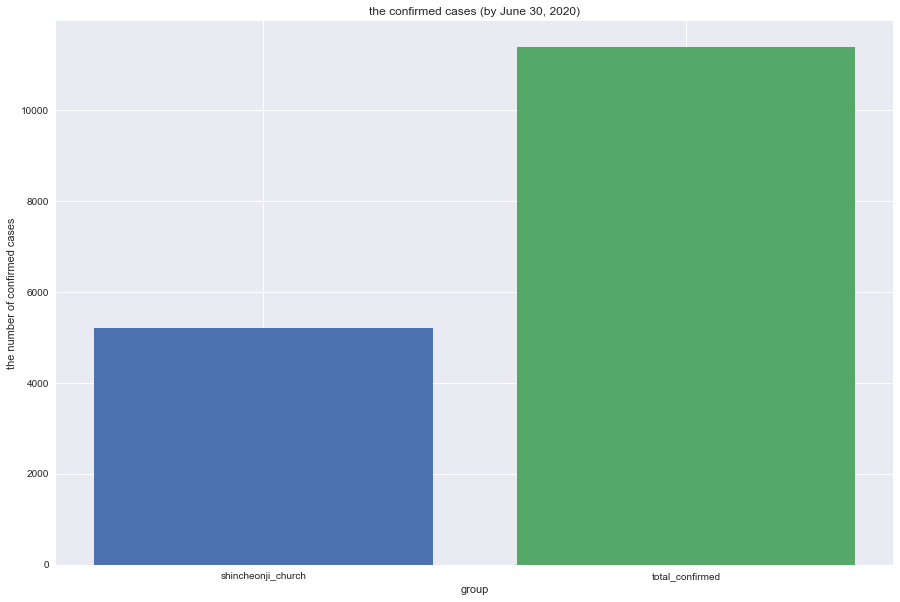

In [102]:
plt.figure(figsize = (15,10))
plt.bar(x_data, y_data, color = ['C0', 'C1'])    # 5213 ,  11395
plt.title('the confirmed cases (by June 30, 2020)')
plt.xlabel('group')
plt.ylabel('the number of confirmed cases')
plt.show()

In [103]:
overseas_inflow = case_csv[case_csv['infection_case'] == 'overseas inflow']['confirmed'].sum()  # 6월 말까지 overseas inflow 에서의 확진자 수
overseas_inflow

949

In [104]:
A24 = round((overseas_inflow / total_confirmed) * 100, 2)
A24

8.33

In [105]:
print('Answer to Q24:', A24,'%')

Answer to Q24: 8.33 %


### Q25

In [106]:
case_csv[case_csv['group'] == True]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
164,6100007,Gyeongsangnam-do,Yangsan-si,True,Soso Seowon,3,35.338811,129.017508
165,6100008,Gyeongsangnam-do,from other city,True,Itaewon Clubs,2,-,-
166,6100009,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-


In [107]:
group_confirmed = case_csv[case_csv['group'] == True]['confirmed'].sum() # the number of confirmed cases through group
group_confirmed

7851

In [108]:
A25 = round((group_confirmed / total_confirmed) * 100, 2)
A25

68.9

In [109]:
print('Answer to Q25:', A25,'%')

Answer to Q25: 68.9 %


### Q26

In [110]:
case_csv[case_csv['group'] == False]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
35,1000036,Seoul,-,False,overseas inflow,298,-,-
36,1000037,Seoul,-,False,contact with patient,162,-,-
37,1000038,Seoul,-,False,etc,100,-,-
45,1100008,Busan,-,False,overseas inflow,36,-,-
46,1100009,Busan,-,False,contact with patient,19,-,-
47,1100010,Busan,-,False,etc,30,-,-
55,1200008,Daegu,-,False,overseas inflow,41,-,-
56,1200009,Daegu,-,False,contact with patient,917,-,-
57,1200010,Daegu,-,False,etc,747,-,-
60,1300003,Gwangju,-,False,overseas inflow,23,-,-


In [111]:
individual_confirmed = case_csv[case_csv['group'] == False]['confirmed'].sum()
individual_confirmed

3544

In [112]:
A26 = individual_confirmed

In [113]:
print('Answer to Q26:', A26)

Answer to Q26: 3544


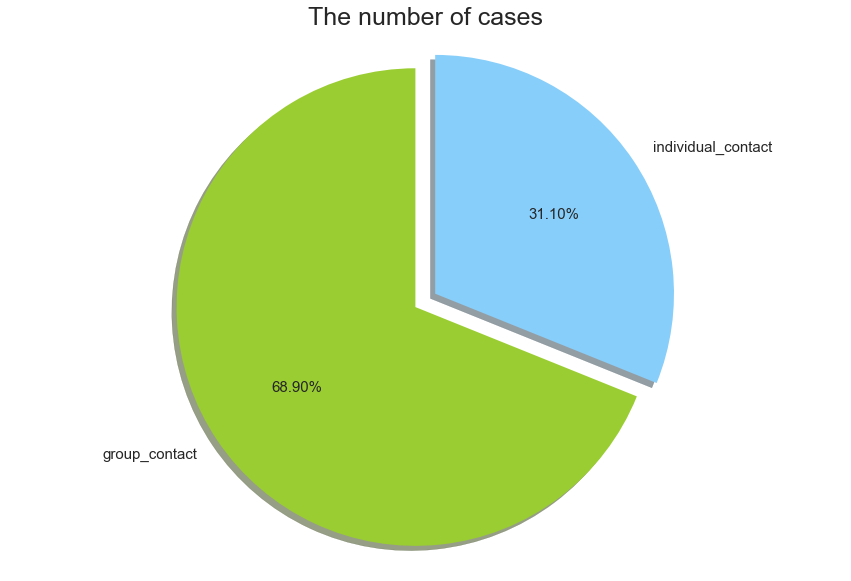

In [114]:
plt.figure(figsize = (15,10))
plt.pie( [group_confirmed, individual_confirmed],  # 7851, 3544

        explode=[0,0.1], # 간격 벌리는 값

        labels=['group_contact', 'individual_contact'],  

        colors=['yellowgreen', 'lightskyblue'], 

        autopct='%.2f%%',  # second decimal place

        shadow=True, 

        startangle=90, # 보기 좋게 돌리기

        textprops={'fontsize': 15}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title('The number of cases', fontsize=25)

plt.show()

### Task 5: Weather

### Q27

In [115]:
weather_csv = pd.read_csv(eda_paths[-1])
weather_csv.head()  # 몇개의 row만 보여준다. 

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [116]:
weather_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [117]:
weather_csv.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

In [118]:
weather_csv.isna().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

In [119]:
null_counts = weather_csv.isna().values  # array로 가져온다.
null_counts

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [120]:
null_counts.shape

(26271, 10)

In [121]:
null_count = 0
for x in null_counts:
    for y in x:
        if y == True:
            null_count = null_count + 1  # True 이면 1 증가, 왜냐하면 True이면 null 값이기 때문이다.
        
null_count

81

In [122]:
A27 = null_count
print('Answer to Q27:', A27)

Answer to Q27: 81


### Q28

In [123]:
null_counts = weather_csv.isna().values  # array로 가져온다.
null_counts

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [124]:
null_counts.shape  # 전체 entry 수 : 26271

(26271, 10)

In [125]:
count = 0
for x in null_counts:
    if True in x:
        count = count + 1
count

47

In [126]:
A28 = 26271 - 47
A28

26224

In [127]:
print('Answer to Q28:', A28)

Answer to Q28: 26224


### Q29

In [128]:
weather_csv

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [129]:
weather_csv['province']

0                   Seoul
1                   Busan
2                   Daegu
3                 Gwangju
4                 Incheon
               ...       
26266        Jeollabuk-do
26267        Jeollanam-do
26268    Gyeongsangbuk-do
26269    Gyeongsangnam-do
26270             Jeju-do
Name: province, Length: 26271, dtype: object

In [130]:
weather_csv['province'].unique()  # one misspelled entry : Chunghceongbuk-do

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Chunghceongbuk-do'], dtype=object)

In [131]:
A29 = len(weather_csv['province'].unique()) - 1
A29

16

In [132]:
print('Answer to Q29:', A29)

Answer to Q29: 16


### Q30, Q31

In [133]:
weather_csv['avg_temp']

0         1.2
1         5.3
2         1.7
3         3.2
4         3.1
         ... 
26266    22.0
26267    21.9
26268    20.4
26269    21.9
26270    23.2
Name: avg_temp, Length: 26271, dtype: float64

In [134]:
weather_csv['avg_temp'].max()

33.9

In [135]:
A30 = weather_csv['avg_temp'].max()
A30

33.9

In [136]:
print('Answer to Q30:', A30)  

Answer to Q30: 33.9


In [137]:
weather_csv['avg_relative_humidity']

0        73.0
1        52.1
2        70.5
3        73.1
4        83.9
         ... 
26266    85.1
26267    97.9
26268    90.9
26269    85.0
26270    87.4
Name: avg_relative_humidity, Length: 26271, dtype: float64

In [138]:
weather_csv['avg_relative_humidity'].min()

10.4

In [139]:
A31 = weather_csv['avg_relative_humidity'].min()
A31

10.4

In [140]:
print('Answer to Q31:', A31)  

Answer to Q31: 10.4


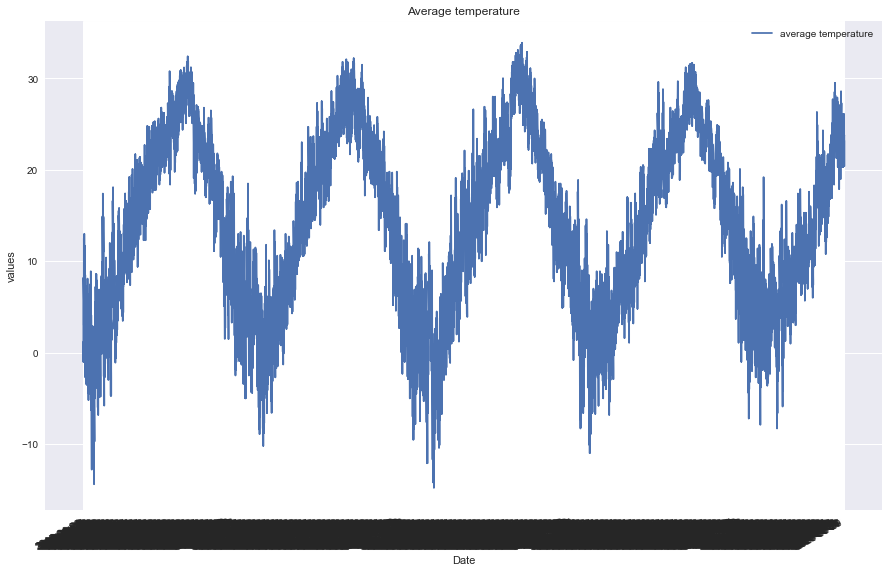

In [141]:
plt.figure(figsize = (15,10))
plt.title('Average temperature')
plt.xlabel('Date')
plt.ylabel('values')
plt.plot('date', 'avg_temp', data = weather_csv, label = 'average temperature')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [142]:
weather_csv['date'] = pd.to_datetime(weather_csv['date'])

In [143]:
type(weather_csv.iloc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

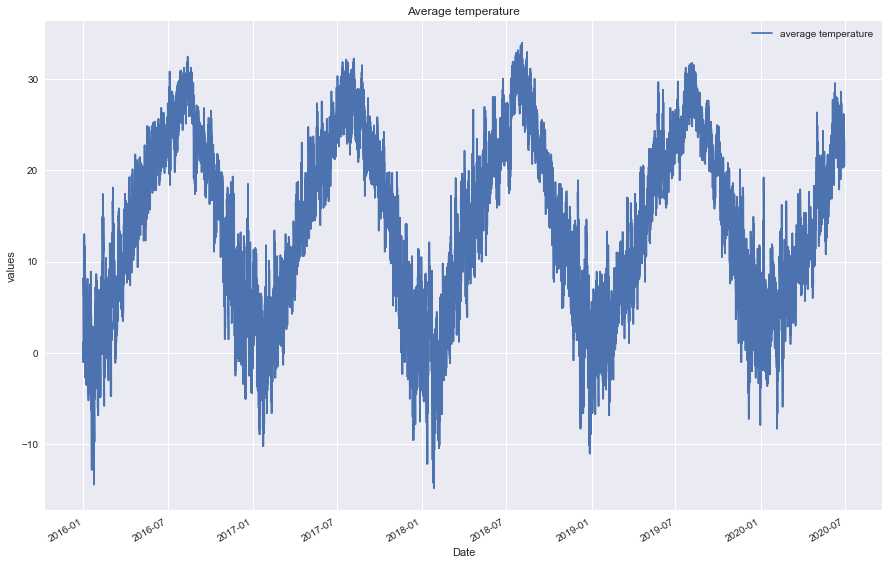

In [144]:
plt.figure(figsize = (15,10))
plt.title('Average temperature')
plt.xlabel('Date')
plt.ylabel('values')
plt.plot('date', 'avg_temp', data = weather_csv, label = 'average temperature')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

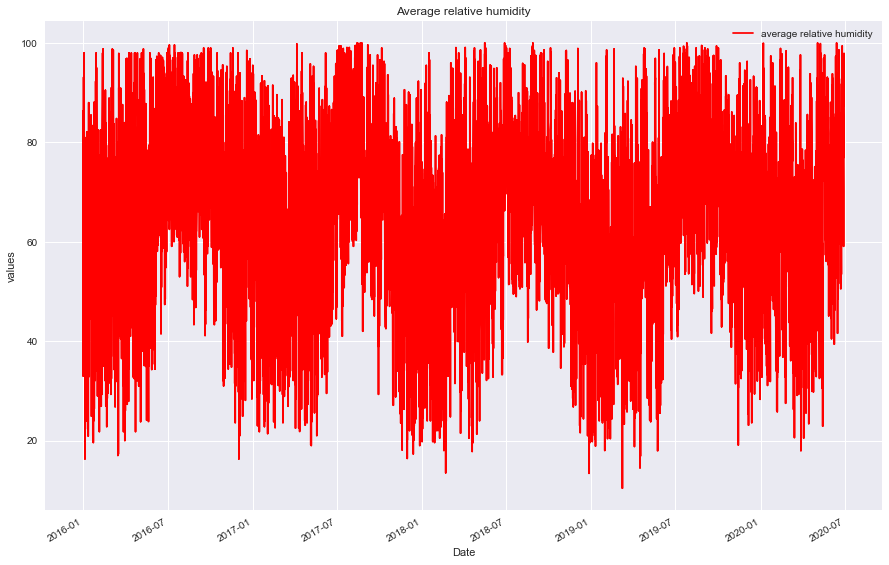

In [145]:
plt.figure(figsize = (15,10))
plt.title('Average relative humidity')
plt.xlabel('Date')
plt.ylabel('values')
plt.plot('date', 'avg_relative_humidity', data = weather_csv, label = 'average relative humidity', c='red')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

### Task 6: Patient

### Q32, Q33

In [146]:
patient_csv = pd.read_csv(eda_paths[1])
patient_csv.head()  # 몇개의 row만 보여준다. 

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [147]:
patient_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [148]:
type(patient_csv.iloc[0]['contact_number'])  # string 타입에서 숫자형타입으로 바꿔주어야한다.

str

In [149]:
patient_csv['contact_number'].unique()  # '-' 문자가 포함되어 있어서 
                            # patient_csv['contact_number'] = pd.to_numeric(patient_csv['contact_number']) 을 하면 ValueError가 발생한다.

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', nan, '4', '3', '1', '1000000796', '13', '12', '1091',
       '131', '16', '14', '485', '19', '296', '15', '34', '37', '22', '7',
       '10', '28', '21', '5', '25', '18', '159', '11', '30', '41', '71',
       '38', '24', '185', '69', '39', '1160', '450', '65', '156', '47',
       '86', '74', '46', '64', '66', '40', '20', '42', '107', '29', '26',
       '45', '-', '95', '422', '290', '32', '53', '70', '35', '51', '130',
       '106', '174', '78', '33', '89', '61', '113', '36', '6100000098',
       '6100000099', '87', '84', '140', '72'], dtype=object)

In [150]:
patient_csv['contact_number'] = patient_csv['contact_number'].apply(pd.to_numeric, errors = 'coerce') # 문자를 강제로 NaN으로 변환

In [151]:
type(patient_csv.iloc[0]['contact_number']) 

numpy.float64

In [152]:
y_data = patient_csv['contact_number'].unique()
y_data

array([7.5000000e+01, 3.1000000e+01, 1.7000000e+01, 9.0000000e+00,
       2.0000000e+00, 4.3000000e+01, 0.0000000e+00, 6.8000000e+01,
       6.0000000e+00, 2.3000000e+01, 1.1700000e+02, 2.7000000e+01,
       8.0000000e+00,           nan, 4.0000000e+00, 3.0000000e+00,
       1.0000000e+00, 1.0000008e+09, 1.3000000e+01, 1.2000000e+01,
       1.0910000e+03, 1.3100000e+02, 1.6000000e+01, 1.4000000e+01,
       4.8500000e+02, 1.9000000e+01, 2.9600000e+02, 1.5000000e+01,
       3.4000000e+01, 3.7000000e+01, 2.2000000e+01, 7.0000000e+00,
       1.0000000e+01, 2.8000000e+01, 2.1000000e+01, 5.0000000e+00,
       2.5000000e+01, 1.8000000e+01, 1.5900000e+02, 1.1000000e+01,
       3.0000000e+01, 4.1000000e+01, 7.1000000e+01, 3.8000000e+01,
       2.4000000e+01, 1.8500000e+02, 6.9000000e+01, 3.9000000e+01,
       1.1600000e+03, 4.5000000e+02, 6.5000000e+01, 1.5600000e+02,
       4.7000000e+01, 8.6000000e+01, 7.4000000e+01, 4.6000000e+01,
       6.4000000e+01, 6.6000000e+01, 4.0000000e+01, 2.0000000e

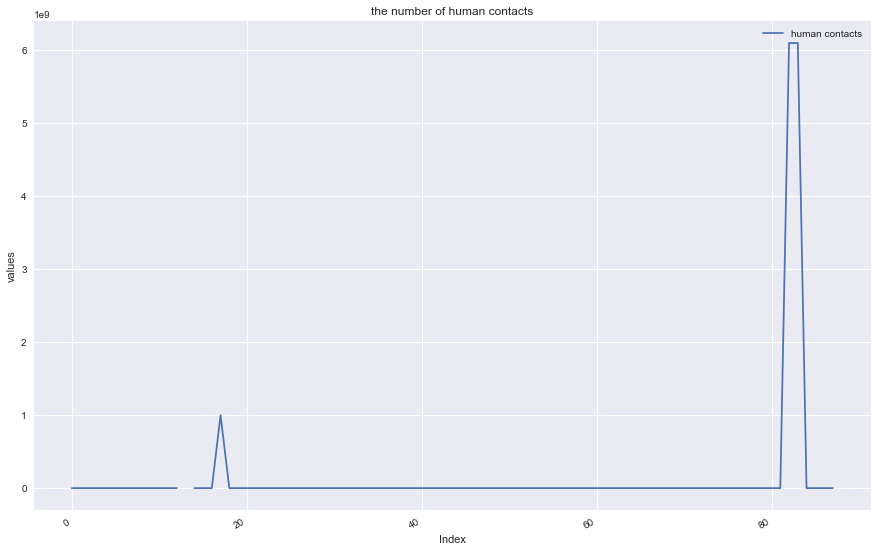

In [153]:
x_data = range(len(y_data))
plt.figure(figsize = (15,10))
plt.title('the number of human contacts')
plt.xlabel('Index')
plt.ylabel('values')
plt.plot(x_data, y_data, label = 'human contacts')   # 다른 y값들과 비교 했을 때 6.1000001e+09 값이 너무 커서 y축 단위가 1e9이다.
plt.legend()
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [154]:
A32 = int(patient_csv['contact_number'].max())
A32

6100000099

In [155]:
print('Answer to Q32:', A32)  

Answer to Q32: 6100000099


In [156]:
patient_csv['country'].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [157]:
patient_info = patient_csv.values
patient_info

array([[1000000001, 'male', '50s', ..., '2020-02-05', nan, 'released'],
       [1000000002, 'male', '30s', ..., '2020-03-02', nan, 'released'],
       [1000000003, 'male', '50s', ..., '2020-02-19', nan, 'released'],
       ...,
       [7000000017, nan, nan, ..., nan, nan, 'isolated'],
       [7000000018, nan, nan, ..., nan, nan, 'isolated'],
       [7000000019, nan, nan, ..., nan, nan, 'isolated']], dtype=object)

In [158]:
patient_info.shape

(5165, 14)

In [159]:
count = 0
for x in patient_info:
    if 'Korea' not in x:
        count = count + 1
        
count

42

In [160]:
A33 = count

In [161]:
print('Answer to Q33:', A33)  

Answer to Q33: 42


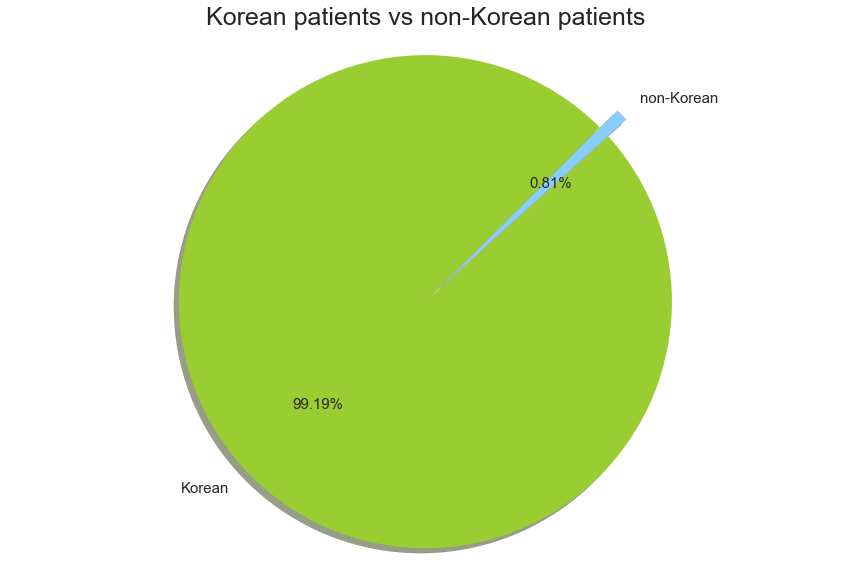

In [162]:
y_data = [5123, 42]
plt.figure(figsize = (15,10))
plt.pie( y_data,  

        explode=[0,0.1], # 간격 벌리는 값

        labels=['Korean', 'non-Korean'],  

        colors=['yellowgreen', 'lightskyblue'], 

        autopct='%.2f%%',  # second decimal place

        shadow=True, 

        startangle=45, # 보기 좋게 돌리기

        textprops={'fontsize': 15}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title('Korean patients vs non-Korean patients', fontsize=25)

plt.show()

### Task 7: Search

### Q34, Q35, Q36

In [163]:
search_csv = pd.read_csv(eda_paths[4])
search_csv.head()  # 몇개의 row만 보여준다. 

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [164]:
search_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [165]:
search_csv['date'] = pd.to_datetime(search_csv['date']) # string이면 그래프에서 날짜를 확인하기가 어렵다.

In [166]:
type(search_csv.iloc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

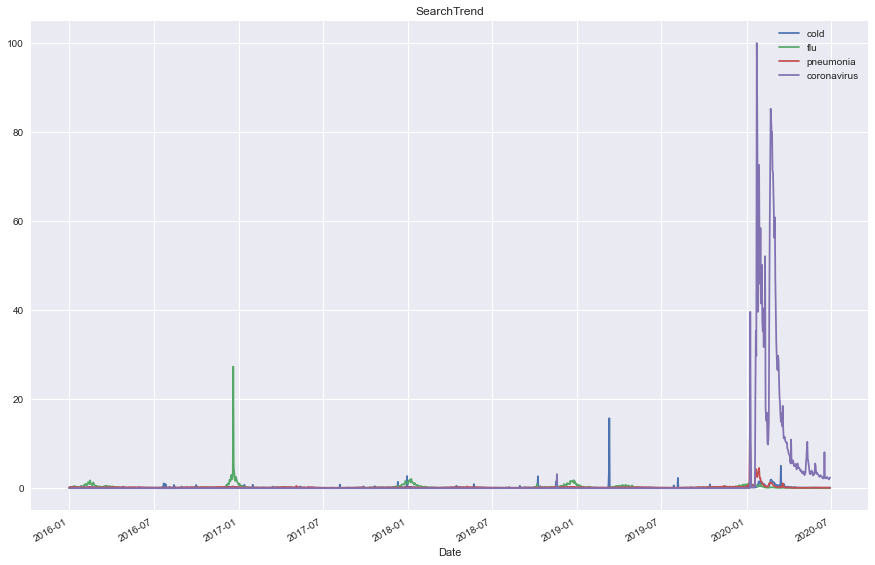

In [167]:
plt.figure(figsize = (15,10))  # set the image size
plt.title('SearchTrend')   # set the title

plt.plot('date', 'cold', data = search_csv, label = 'cold')
plt.plot('date', 'flu', data = search_csv, label = 'flu')
plt.plot('date', 'pneumonia', data = search_csv, label = 'pneumonia')
plt.plot('date', 'coronavirus', data = search_csv, label = 'coronavirus')

plt.legend()  # show the legend
# add axis label
plt.xlabel('Date')
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [168]:
new_data = search_csv[search_csv['date'] >= '2020-01-01']  # 부등호로 날짜 비교 가능
new_data

,date,cold,flu,pneumonia,coronavirus
1461,2020-01-01,0.14454,0.48434,0.44880,0.01699
1462,2020-01-02,0.19508,0.85751,0.36471,0.01827
1463,2020-01-03,0.19581,0.80443,0.46598,0.02845
1464,2020-01-04,0.60343,0.86961,0.49571,0.02136
1465,2020-01-05,0.20081,0.84152,0.41644,0.01927
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


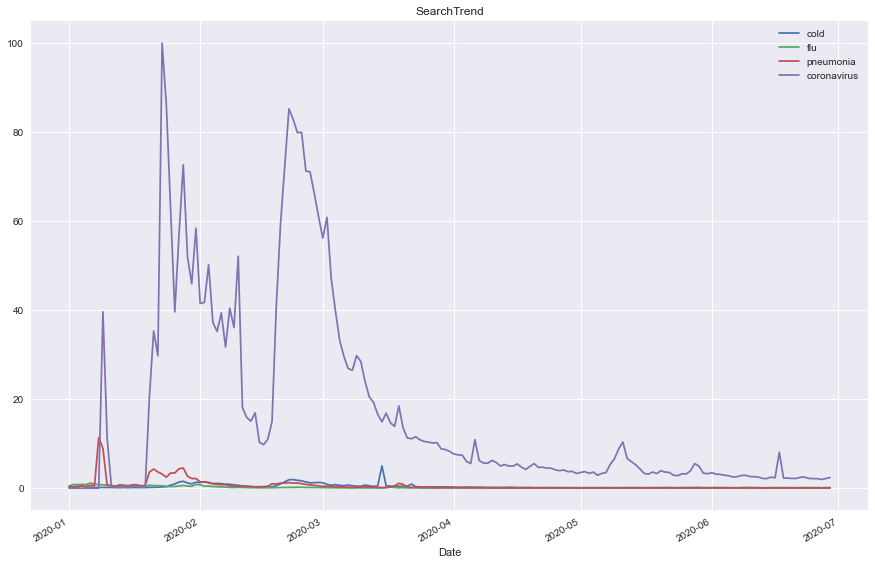

In [169]:
plt.figure(figsize = (15,10))  # set the image size
plt.title('SearchTrend')   # set the title

plt.plot('date', 'cold', data = new_data, label = 'cold')
plt.plot('date', 'flu', data = new_data, label = 'flu')
plt.plot('date', 'pneumonia', data = new_data, label = 'pneumonia')
plt.plot('date', 'coronavirus', data = new_data, label = 'coronavirus')

plt.legend()  # show the legend
# add axis label
plt.xlabel('Date')
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 
plt.show()

In [170]:
A34 = 4
print('Answer to Q34:', A34)  

Answer to Q34: 4


In [171]:
date = search_csv['date'].unique()  # start와 end의 날짜를 알 수 있다.
date

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2020-06-27T00:00:00.000000000', '2020-06-28T00:00:00.000000000',
       '2020-06-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [172]:
x = date[-1] - date[0]
x

numpy.timedelta64(141782400000000000,'ns')

In [173]:
days = x.astype('timedelta64[D]') # ns를 Day로 타입을 바꾸어준다.
days

numpy.timedelta64(1641,'D')

In [174]:
A35 = int(days / np.timedelta64(1,'D'))
A35

1641

In [175]:
print('Answer to Q35:', A35)  

Answer to Q35: 1641


In [176]:
search_csv[search_csv['coronavirus'] == 100]

,date,cold,flu,pneumonia,coronavirus
1483,2020-01-23,0.30308,0.55625,3.18035,100.0


In [177]:
d_day = search_csv[search_csv['coronavirus'] == 100]['date']
d_day

1483   2020-01-23
Name: date, dtype: datetime64[ns]

In [203]:
# 2020-01-20이 대한민국에서 첫 번째 코로나 확진자가 발생한 날짜

In [181]:
A36 = 3
print('Answer to Q36:', A36)  

Answer to Q36: 158


### Task 8: Test

### Q37

In [182]:
time_csv = pd.read_csv(eda_paths[6])
time_csv.head()  # 몇개의 row만 보여준다.

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [183]:
time_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [184]:
A37 = time_csv['test'].max()
A37

1273766

In [185]:
print('Answer to Q37:', A37)  

Answer to Q37: 1273766


### Q38

In [186]:
neg = time_csv['negative'].max()
neg

1240157

In [187]:
all_test = time_csv['test'].max()
all_test

1273766

In [188]:
A38 = round((neg / all_test) * 100, 2)  # round to the nearest hundredths 이므로 round 함수 이용
A38

97.36

In [189]:
print('Answer to Q38:', A38)  

Answer to Q38: 97.36


### Q39, Q40

In [190]:
time_csv['date'].unique()

array(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
       '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-

In [191]:
A39 = time_csv['deceased'].max()
A39

282

In [192]:
print('Answer to Q39:', A39)  

Answer to Q39: 282


In [193]:
A40 = time_csv['released'].max()
A40

11537

In [194]:
print('Answer to Q40:', A40)  

Answer to Q40: 11537


In [195]:
time_csv['date'] = pd.to_datetime(time_csv['date'])

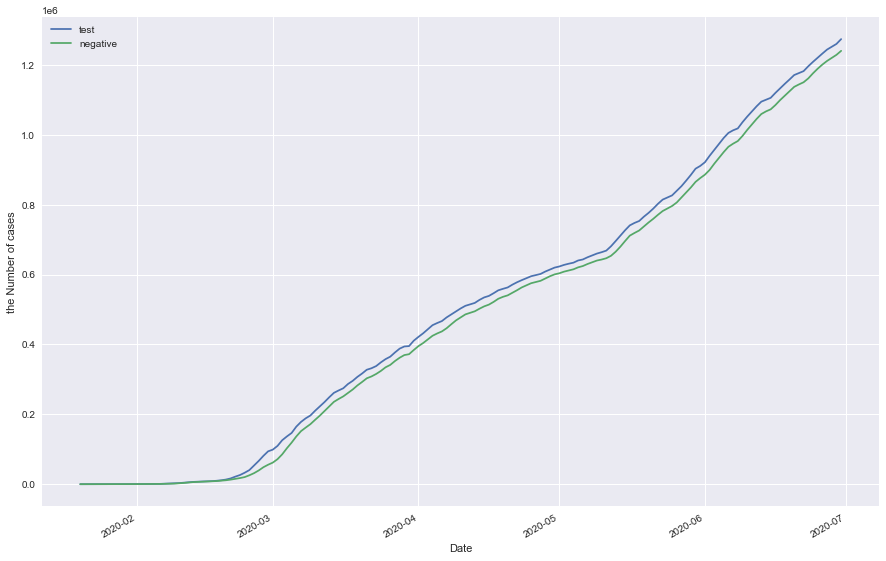

In [196]:
plt.figure(figsize = (15,10))  # set the image size

plt.plot('date', 'test', data = time_csv, label = 'test')
plt.plot('date', 'negative', data = time_csv, label = 'negative')

plt.legend()  # show the legend
# add axis label
plt.xlabel('Date')
plt.ylabel('the Number of cases')
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 

plt.show()

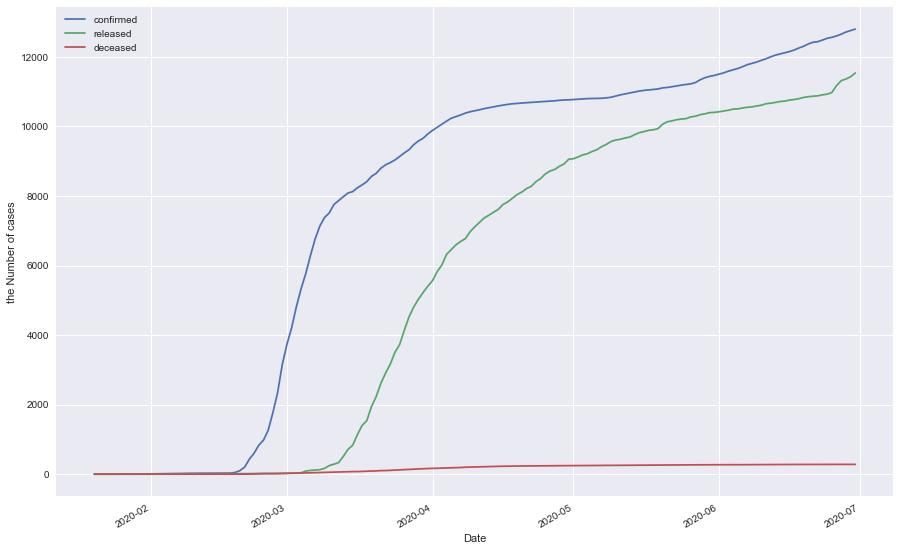

In [197]:
plt.figure(figsize = (15,10))  # set the image size

plt.plot('date', 'confirmed', data = time_csv, label = 'confirmed')
plt.plot('date', 'released', data = time_csv, label = 'released')
plt.plot('date', 'deceased', data = time_csv, label = 'deceased')

plt.legend()  # show the legend
# add axis label
plt.xlabel('Date')
plt.ylabel('the Number of cases')
plt.gcf().autofmt_xdate()  # x축 데이터 날짜를 보기 좋게 바꾼다. 

plt.show()

# Summary and comprehensive discussion

### 2016707079_하상천


- lab을 진행하면서 느낀점은 pandas의 unique 함수가 정말 유용한 것 같다. 공통되는 것을 하나로 줄여줌으로써 data를 처리하기 쉽게 만들어주는 것 같다. 
- 6번 문제에서는 plt.plot('date', 'confirmed', data = age_csv[age_csv['age'] == age], label = age) 를 통해 그래프를 그렸는데, 지금까지는 x, y data를 미리 정의하고 파라미터로 넣어야 된다고 생각하고 있었는데 위의 문장처럼 column들을 x, y data로 넣고 또 다른 파라미터로 pandas DataFrame을 넣어도 된다는 것을 알게 되었다. 
- 16번 문제에서는 date가 string type일 때 모든 날짜가 나와서 글씨가 겹치게 된다. 그래서 날짜를 확인 할 수 없는 문제가 생겼었다. 그래서 date를 pandas의 to_datetime() 함수를 사용해서 Timestamp 타입으로 바꾸어주었더니 날짜가 요약되어 보기 좋게 나오는 것을 확인 할 수 있었다. 또한 plt.bar 함수와 plt.pie 함수를 처음 이용해보았는데, 원하는 모습으로 data를 표현할 수 있어서 너무 좋았다.    
- 22번 문제에서는 엄청 많은 감염경로들에 대해 unique 함수를 써서 공통된 것을 줄이는 내용이 있었는데 실행시간이 얼마나 걸릴지 궁금해서 %time case_csv['infection_case'].unique() 을 통해 측정해보았다. 놀랍게도 0ns가 나왔다. 사람이 했다면 최소한 30분정도는 걸릴 일인데 1초도 아니라 0ns가 걸렸다는 것은 ps 단위 인 것 같다. 다시 한번 컴퓨터가 대단하다 라는 것을 느꼈다. 
- 32번 문제에서 string 타입을 숫자형 타입으로 바꾸어주려고 할 때, 문자가 있어서 변환이 되지 않고 ValueError가 발생했다. 그래서 patient_csv['contact_number'].apply(pd.to_numeric, errors = 'coerce')에 errors = 'coerce'를 주어서 문자를 강제로 NaN으로 바꾸어주고, 숫자형 타입으로 바꾸어주었다.
- 34, 35번 문제에서는 Timestamp 타입으로 바꾼 date를 부등호로 비교하는 것이 가능하다는 것을 알게 되었고, 두 date를 빼니까 numpy.timedelta64(141782400000000000,'ns')가 나와서 astype('timedelta64[D]')를 통해 ns에서 day로 바꾸어주었다.   
- 이러한 점들을 느끼면서, 글로만 공부하는 것보다 실제로 여러가지들을 찾아보면서 코딩하는 것이 더 많이 배울 수 있고, 머리 속에도 더 오래 기억된다는 것을 알게 되었다. 또한 이번 lab을 진행하면서 수업시간에 배운 numpy, pandas, matplotlib 라이브러리에 대해 더 깊게 공부해볼 수 있었던 것 같다. 라이브러리에 있는 함수들을 다 알지 못해서 코딩할 때 인터넷에서도 많이 찾아보고 dir() 함수 등을 통해서도 찾아보았다. 여러 개의 라이브러리를 사용해보는 것도 좋았지만 직접 파이썬 코딩을 하니까 코딩 실력도 많이 좋아진 것 같다.